# Mall Customer Segmentation

##Content

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

##Problem Statement 

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
#Import Usefull Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import mall dataset
df = pd.read_csv('.../Mall_Customers.csv')

# Data Exploration

In [3]:
df.shape

(200, 5)

In [4]:
#We have 200 observations and 5 variables total

In [5]:
#Explore mall dataset
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#As we see, there are no null values in the dataset

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
#Of the 5 variables we have (customer id, age, annual income and spending score) we could remove customer id 
#and thereafter try explore the relationship between the other variables
del df['CustomerID']

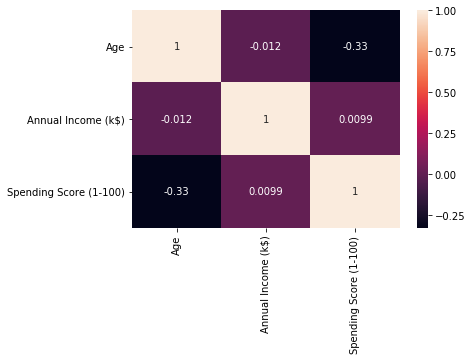

In [10]:
df.corr()
sns.heatmap(df.corr(), annot=True)
plt.show()

In [11]:
#We do not observe strong correlatons between our variables.

In [12]:
#Lets now explore the distributions of our key variables

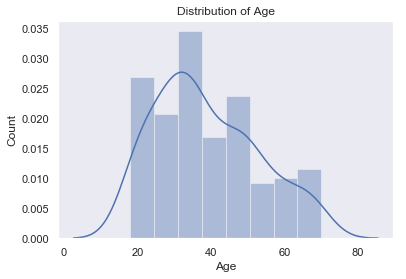

In [13]:
#Distribution of Age
sns.set(style = 'dark')
sns.distplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [14]:
#As we see the mean age is 39 yrs old and the age distribution is slightly skewed to the right

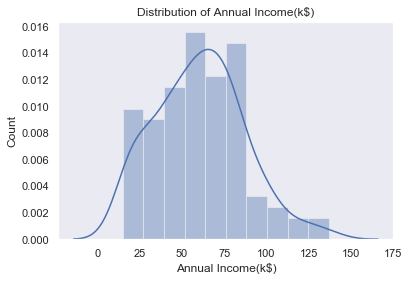

In [15]:
#Distribution of Annual Income 
sns.set(style = 'dark')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income(k$)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Count')
plt.show()

In [16]:
#The average annual income is around $60k per year and the income distribution is quite normal.

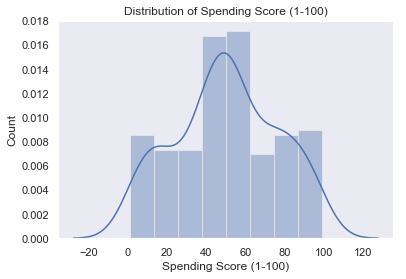

In [17]:
#Distribution of Spending Score
sns.set(style = 'dark')
sns.distplot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

In [18]:
#The average spending score is around 50 and

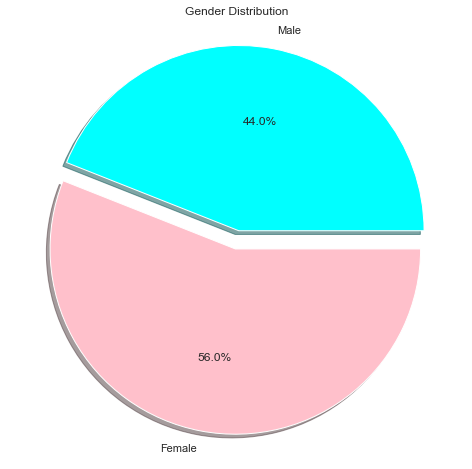

In [19]:
#Gender Distribution
labels = ['Male', 'Female']
size = [df.query('Gender == "Male"').Gender.count(), df.query('Gender == "Female"').Gender.count()]

#colors
colors = ['cyan', 'pink']

#explosion
explode = [0.05, 0.05]
plt.figure(figsize=(8,8))
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%1.1f%%')
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

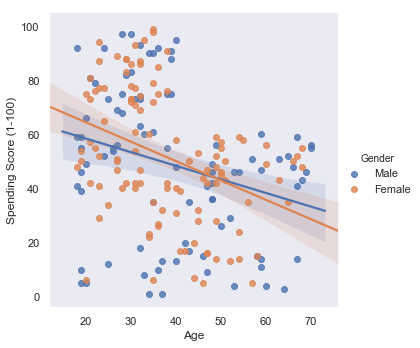

In [20]:
#Explore how males and females are spending based on age
sns.lmplot(x='Age', y='Spending Score (1-100)', data=df, fit_reg=True, hue='Gender')
plt.show()

In [21]:
#Among customers who are 50 years old or younger women spend slightly more than men. Among customers who are 50 yrs old and older, men spend slightly more than women.

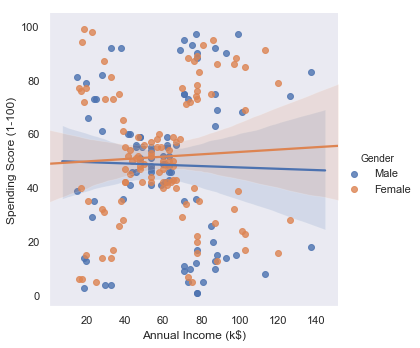

In [22]:
#Explore how men and women spend based on annual income.
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, fit_reg=True, hue='Gender')
plt.show()

In [23]:
#Women with higher income spend slightly more.

#Overall we see that spending score is not correlated with age, gender or annual income, therefore we expect that 
a clustering analysis will allow us to get a better idea on the various customer segments that exist. We will try to do that by utilizing a k-means clustering algorithm and a hierarchical clustering algorithm. The two variable that we will use are the annual income and the spending score.

# K-Means Clustering

In [24]:
df.shape

(200, 4)

In [25]:
#Feature selection
X = df.iloc[:, [2,3]].values

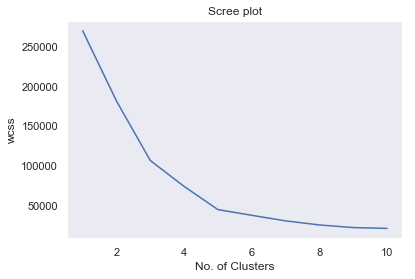

In [26]:
#First we need to determine what is optimum cluster number for our dataset.
#Our aim is to minimize the WCSS (within-cluster sums of squares)

from sklearn.cluster import KMeans

#assuming that the max # of clusters would be 10

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  km.fit(X)
  wcss.append(km.inertia_)  #inertia_ is the formula used to segregate the data points into clusters
  
plt.plot(range(1, 11), wcss)
plt.title('Scree plot')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [27]:
#We see that the optimum # of clusters is 5 per the "elbow rule".

In [28]:
#K-means Clustering Model
kmeans_model = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeans_model.fit_predict(X)

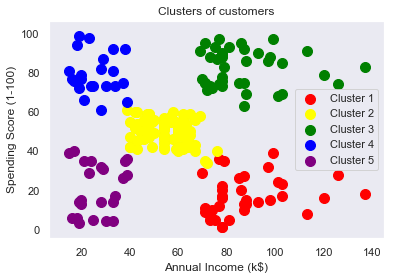

In [29]:
#Cluster Vizualization

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'blue', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'purple', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Interpretation of the Clusters

Cluster 1 (Red Color) -> High income - low spending

Cluster 2 (Yelow Color) -> Average income - average spending 

Cluster 3 (Green Color) -> High Income - high spening 

Cluster 4 (Blue Color) -> Low income - high spending

Cluster 5 (Purple Color) -> Low income - low spending


Based on the above, our TARGET Consumers would be Cluster 3 and we would advice the marketing department to reach out to them very frequently (i.e. daily) as they are very likely to converge.

Consumers that belong to Cluster 4 are likely to be more interested in sales and bargain prices as they earn less compare to Cluster 3.

Lastly, we would advice the marketing team to reach out to Cluster 2 once or twice a week and once or twice a month to Cluster 5 & Cluster 1.

# Hierarchical Clustering

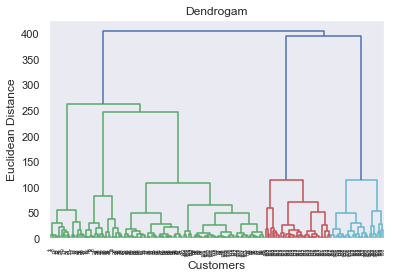

In [30]:
# Hierarchical clustering is an alternative approach which does not require that we commit to a particular choice 
#of K clusters. Once we grow our dendogram we will determine an optimal # of clusters based on Euclidean distance.

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

Based on the Euclidean Distance we can see that indeed 5 is an optimum number of clusters for our dataset